### 웹 크롤링의 기초개념

**웹 크롤링 vs 웹 스크래핑**

- 웹 크롤러(Web Crawler) : 웹 사이트에 있는 수많은 정보 가운데 우리가 원하는 정보를 수집하는 프로그램
- 웹 크롤링(Web Crawling) : 웹 크롤러를 이용해 데이터를 수집하는 행위
- 웹 스크래핑(Web Scraping) : 웹 사이트에서 원하는 정보를 추출하는 것은 웹 크롤링과 동일함. 그러나 전체 사이트의 데이터가 아닌 원하는 정보 일부만을 추출

**웹 크롤링 프로세스**

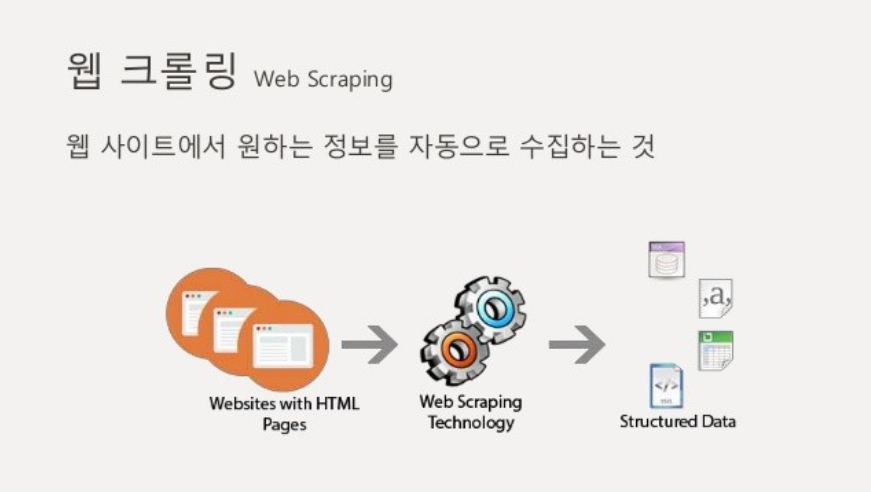

In [159]:
from IPython.display import Image
Image('./web crawling.png', width=600)

- 정보를 얻고하 하는 웹 사이트에 접속해 웹 페이지를 확인
- 키보드의 F12 키 또는 개발자 도구로 들어가 원하는 정보의 위치를 확인하고 분석
- 파이썬 코드를 작성해  접속한 웹 페이지의 html 코드를 불러옴
- 불러온 데이터에서 원하는 정보를 가공한 후 추출
- 추출한 정보를 csv나 데이터베이스 등 다양한 형재로 저장하거나 가공하고 시각화

**클라이언트 서버 개념**

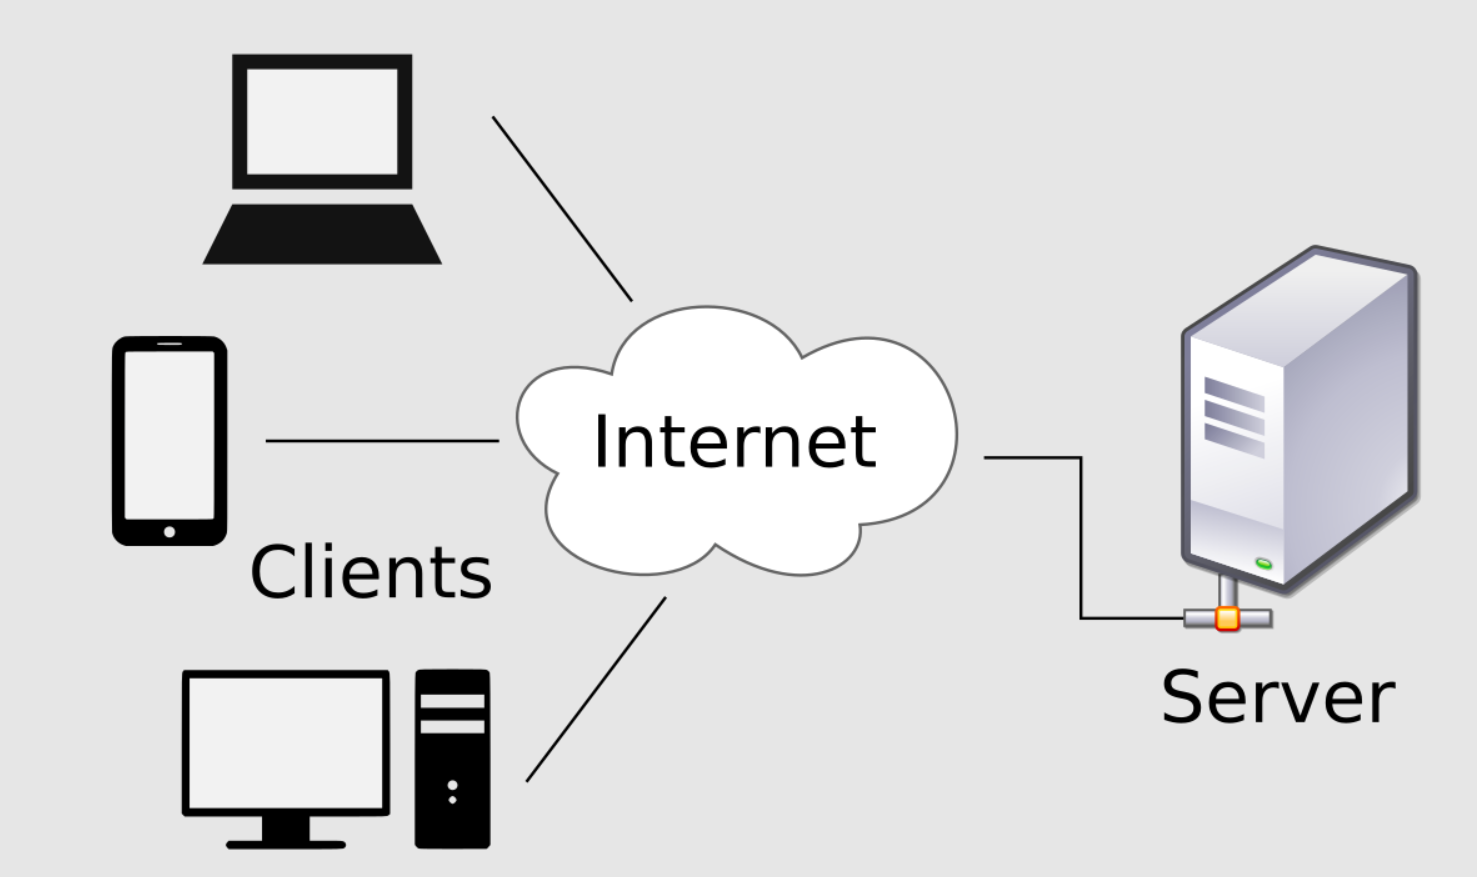

In [160]:
from IPython.display import Image
Image('./serverclient.png', width=600)

**HTTP 통신의 이해**

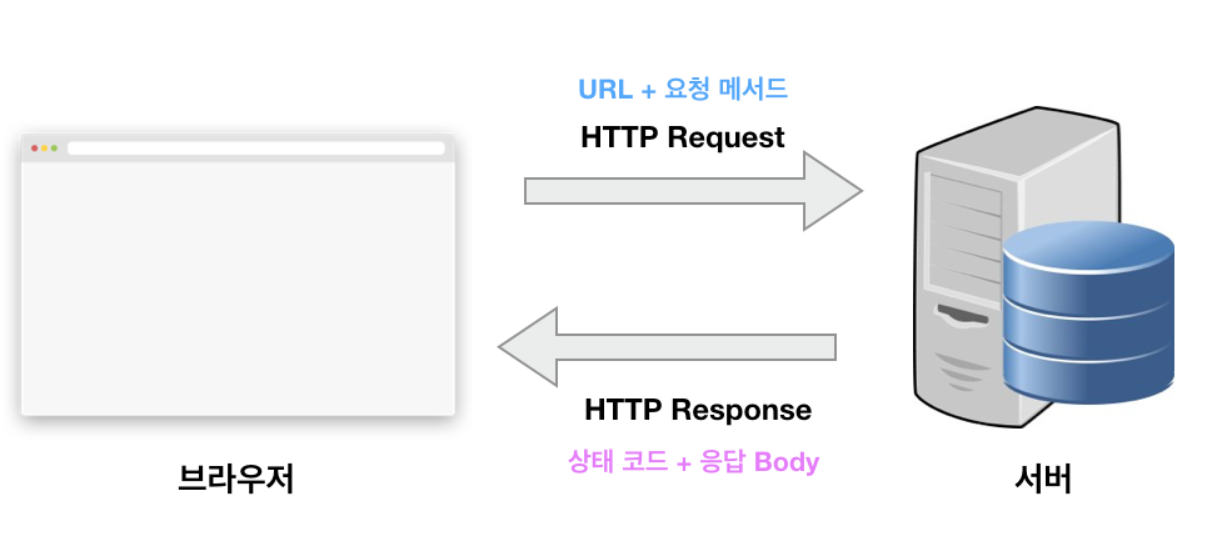

In [161]:
from IPython.display import Image
Image('./http.png', width=600)

### 웹 페이지의 구성 요소들

참고 사이트 : https://www.w3schools.com/

**1. HTML**
- 웹페이지의 뼈대

**practice.html**
```
<!doctype html>
<html>
    <head>
        <title> 기초 스크레이핑 </title>
    </head>
    <body>
        스크레이핑을 해봅시다
    </body>
</html>
```

```
<!doctype html> : 문서타입이 HTML 문서라는 의미
<html> : HTML 문서의 시작과 끝을 의미, 작성하고자 하는 모든 웹 문서는 <html> 태그 사이에 있어야 함
<head> : 웹브라우저가 문서를 해석하는데 필요한 정보들을 입력하는 곳
<title> : 웹브라어주의 제목 표시줄에 표시
<body> : 웹페이지에서 보게 될 주요 정보들
```

**속성추가**
```
<img> 태그의 경우는 속성을 추가해서 이미지의 가로길이, 세로길이 등으로 이미지의 크기를 조정할 수 있음
<img src="./image/image01.jpg", width="200", height="100">

<a> 태그의 경우도 연결할 링크 정보 등을 넣을 수 있음
<a href="http://google.com">Google </a>
```

**종료 태그가 없는 태그들**
```
<br>, <img>, <link>, <input>
```

**자주 사용하는 HTML 태그들**
```
<h1> 제목 </h1> : 큰 폰트 사용
<p> 문단 </p> : 줄바꿈없는 한 문단
<li> 목록 </li> : 목록 만들 때 사용
<table> 표 </table>
<tr>, <td>, <th> : 표 만들 때 사용
<div> </div> : 레이아웃 구분할 때 사용. 블록 단위 부분 공간 정의
<span></span> : 레이아웃 구분할 때 사용. 줄 단위 부분 공간 정의
```

**html의 계층 구조**
- Tree 형태의 부모 자식 관계로 이해

**2. CSS**
- 문서의 스타일을 꾸며주는 기능

**styles/style.css**
```
p {
    color : red;
}
```

```
위 css 코드의 의미
: 웹 페이지의 특정 요소가 <p> 태그를 사용할 때, <p> 태그의 텍스트 색샹을 모두 빨간색으로 지정
```

**practice_css.html**
```
<!doctype html>
<html>
    <head>
        <link href='./styles/style.css' rel='stylesheet' type='text/css'>
        <title> css 적용 </title>
    </head>
    <body>
        <p> 이 문단이 빨간색으로 보여야 합니다. </p>
    </body>
</html>
```

**practice_css.html 코드 설명**
```
<link> : 외부 파일 읽을 수 있음
         href 속성을 이용하여 경로 입력
         rel 속성은 외부 리소스 종류로 css 파일과 같이 스타일시트를 적용할 때 "stylesheet"를 사용
         type 속성은 외부 리소스의 유형 지정
         
<p> : 외부 css 파일에서 설정한 디자인 스타일이 적용 (예: 빨간색으로 변경)  
```

**3. JavaScript**
- 컨텐츠를 동적으로 바꾸는 기능

###  BeautifulSoup 라이브러리
- 크롤링 하는 데 필요한 함수를 한 데 모아 놓은 라이브러리

In [3]:
from bs4 import BeautifulSoup

### Workshop 1

In [5]:
# 파싱할 대상 문서
html_doc = """
<!doctype html>
<html>
    <head>
        <title> 기초 스크레이핑 </title>
    </head>
    <body>
        스크레이핑을 해봅시다
    </body>
</html>
"""

In [6]:
# 문서를 해석 -> "파싱"
# BeautifulSoup(파싱할 대상 문서, 구문분석할 엔진)
# BeautifulSoup을 이용해서 파싱을 한 후 생성된 객체를 soup이라는 변수에 담기
soup = BeautifulSoup(html_doc, 'lxml') # 구문분석할 엔진 : html.parser, lxml

In [7]:
type(soup)

bs4.BeautifulSoup

In [9]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   기초 스크레이핑
  </title>
 </head>
 <body>
  스크레이핑을 해봅시다
 </body>
</html>



In [10]:
#soup.find(태그명)
soup.find('head')

<head>
<title> 기초 스크레이핑 </title>
</head>

In [11]:
soup.find('title')

<title> 기초 스크레이핑 </title>

### Workshop 2

In [12]:
# 파싱할 대상 문서
html_doc = """
<!doctype html>
<html>
    <head>
        <title> 기초 스크레이핑 </title>
    </head>
    <body>
        <li> 첫번째 목록</li>
        <li> 두번째 목록</li>
        <li> 세번째 목록</li>
    </body>
</html>
"""

In [13]:
soup = BeautifulSoup(html_doc, 'lxml')

In [16]:
li=  soup.find('li')
print(li)
print(type(li))

<li> 첫번째 목록</li>
<class 'bs4.element.Tag'>


In [22]:
# 태그안에 포함된 텍스트를 얻고자 할 때
li.text

' 첫번째 목록'

In [17]:
lis = soup.find_all('li')
print(lis)
print(type(lis))

[<li> 첫번째 목록</li>, <li> 두번째 목록</li>, <li> 세번째 목록</li>]
<class 'bs4.element.ResultSet'>


In [18]:
# 파이썬 리스트와 유사하게 색인을 할 수 있음
lis[0]

<li> 첫번째 목록</li>

In [19]:
lis[1]

<li> 두번째 목록</li>

In [20]:
lis[2]

<li> 세번째 목록</li>

In [23]:
lis[0].text

' 첫번째 목록'

In [24]:
lis[1].text

' 두번째 목록'

In [25]:
for li in lis:
    print(li.text)

 첫번째 목록
 두번째 목록
 세번째 목록


### Workshop 3

In [27]:
html_doc = '''
<!doctype html>
<html>
    <head>
        <title>기초 스크레이핑</title>
    </head>
    <body>
        <table border="1">
            <caption> 과일 가격과 개수 </caption>
            <tr>
                <th> 상품 </th>
                <th> 가격 </th>
                <th> 개수 </th>
                
            </tr>
            <tr>
                <td> 오렌지 </td>
                <td> 100원 </td>
                <td> 10개 </td>
            </tr>
            <tr>
                <td> 사과 </td>
                <td> 150 </td>
                <td> 5개 </td>
            </tr>
        </table>
        <br>
        <br>
         <table border="2">
            <caption> 옷 가격과 개수 </caption>
            <tr>
                <th> 상품 </th>
                <th> 가격 </th>
                <th> 개수 </th>
                
            </tr>
            <tr>
                <td> 셔츠 </td>
                <td> 30000원 </td>
                <td> 2개 </td>
            </tr>
            <tr>
                <td> 바지 </td>
                <td> 20000원</td>
                <td> 1개 </td>
            </tr>
        </table>
        
    </body>

</html>
'''

In [28]:
soup = BeautifulSoup(html_doc, 'lxml')

In [31]:
# 두번째 테이블만 가져오고 싶다면 (option 1)
tables = soup.find_all('table')
tables[1]

<table border="2">
<caption> 옷 가격과 개수 </caption>
<tr>
<th> 상품 </th>
<th> 가격 </th>
<th> 개수 </th>
</tr>
<tr>
<td> 셔츠 </td>
<td> 30000원 </td>
<td> 2개 </td>
</tr>
<tr>
<td> 바지 </td>
<td> 20000원</td>
<td> 1개 </td>
</tr>
</table>

In [32]:
# 두번째 테이블만 가져오고 싶다면 (option 2)
table2 = soup.find('table', {'border':'2'})
table2

<table border="2">
<caption> 옷 가격과 개수 </caption>
<tr>
<th> 상품 </th>
<th> 가격 </th>
<th> 개수 </th>
</tr>
<tr>
<td> 셔츠 </td>
<td> 30000원 </td>
<td> 2개 </td>
</tr>
<tr>
<td> 바지 </td>
<td> 20000원</td>
<td> 1개 </td>
</tr>
</table>

### Workshop 4

In [38]:
html_doc = '''
<!doctype html>
<html>
    <head>
        <title> 기초 스크레이핑 </title>
    </head>
    <body>
        <a href="http://www.naver.com">naver</a>
        <a href="http://www.google.com">google</a>
        <a href="http://www.daum.net">daum</a>
    </body>
</html>
'''

In [58]:
soup = BeautifulSoup(html_doc ,'lxml')
a_s = soup.find_all('a')
for a in a_s:
    print(a.text)

naver
google
daum


### Workshop 5

In [63]:
html_doc = '''
<html>
    <head>
        <meta charset = 'utf-8'>
        <title> 작품과 작가 모음</title>
    </head>
    <body>
        <h1> 책 정보 </h1>
        
        <p id='book1_title', class='book_title'>토지</p>
        <p id='author1', class='author'>박경리</p>

        <p id ='book2_title', class='book_title'>태백산맥</p>
        <p id ='author2', class='author'>조정래</p>

        <p id= 'book3_title', class='book_title'>감옥으로부터의 사색</p>
        <p id= 'author3', class='author'> 신영복</p>
        
    </body>
</html>
'''

In [64]:
soup = BeautifulSoup(html_doc, 'lxml')

In [65]:
print(soup.prettify())

<html>
 <head>
  <meta charset="utf-8"/>
  <title>
   작품과 작가 모음
  </title>
 </head>
 <body>
  <h1>
   책 정보
  </h1>
  <p class="book_title" id="book1_title">
   토지
  </p>
  <p class="author" id="author1">
   박경리
  </p>
  <p class="book_title" id="book2_title">
   태백산맥
  </p>
  <p class="author" id="author2">
   조정래
  </p>
  <p class="book_title" id="book3_title">
   감옥으로부터의 사색
  </p>
  <p class="author" id="author3">
   신영복
  </p>
 </body>
</html>



In [66]:
soup.find('title')

<title> 작품과 작가 모음</title>

In [67]:
soup.title # soup.find('title') 와 동일

<title> 작품과 작가 모음</title>

In [68]:
soup.body # soup.find('body') 와 동일

<body>
<h1> 책 정보 </h1>
<p class="book_title" id="book1_title">토지</p>
<p class="author" id="author1">박경리</p>
<p class="book_title" id="book2_title">태백산맥</p>
<p class="author" id="author2">조정래</p>
<p class="book_title" id="book3_title">감옥으로부터의 사색</p>
<p class="author" id="author3"> 신영복</p>
</body>

In [69]:
soup.find('h1')

<h1> 책 정보 </h1>

In [70]:
soup.h1

<h1> 책 정보 </h1>

**책제목/작가** 형식으로 출력해보기
```
(예)
토지/박경리
태백산백/조정래
감옥으로부터의 사색/신영복
```

In [76]:
book_titles = soup.find_all('p', {'class':'book_title'})
book_authors = soup.find_all('p', {'class':'author'})

In [84]:
for book_title, book_author in zip(book_titles, book_authors):
    print(book_title.text, '/', book_author.text)

토지 / 박경리
태백산맥 / 조정래
감옥으로부터의 사색 /  신영복


**select 사용하기**

In [86]:
soup.find_all('p')

[<p class="book_title" id="book1_title">토지</p>,
 <p class="author" id="author1">박경리</p>,
 <p class="book_title" id="book2_title">태백산맥</p>,
 <p class="author" id="author2">조정래</p>,
 <p class="book_title" id="book3_title">감옥으로부터의 사색</p>,
 <p class="author" id="author3"> 신영복</p>]

In [88]:
soup.select('p') # soup.find_all('p') 와 동일한 결과

[<p class="book_title" id="book1_title">토지</p>,
 <p class="author" id="author1">박경리</p>,
 <p class="book_title" id="book2_title">태백산맥</p>,
 <p class="author" id="author2">조정래</p>,
 <p class="book_title" id="book3_title">감옥으로부터의 사색</p>,
 <p class="author" id="author3"> 신영복</p>]

In [89]:
soup.find('p')

<p class="book_title" id="book1_title">토지</p>

In [90]:
soup.select_one('p') # soup.find('p') 와 동일한 결과

<p class="book_title" id="book1_title">토지</p>

In [92]:
soup.select('p')

[<p class="book_title" id="book1_title">토지</p>,
 <p class="author" id="author1">박경리</p>,
 <p class="book_title" id="book2_title">태백산맥</p>,
 <p class="author" id="author2">조정래</p>,
 <p class="book_title" id="book3_title">감옥으로부터의 사색</p>,
 <p class="author" id="author3"> 신영복</p>]

In [93]:
soup.select('body p') # body 태그의 자손인 p 태그

[<p class="book_title" id="book1_title">토지</p>,
 <p class="author" id="author1">박경리</p>,
 <p class="book_title" id="book2_title">태백산맥</p>,
 <p class="author" id="author2">조정래</p>,
 <p class="book_title" id="book3_title">감옥으로부터의 사색</p>,
 <p class="author" id="author3"> 신영복</p>]

In [94]:
soup.select('body>p') # body 태그의 자식인 p 태그

[<p class="book_title" id="book1_title">토지</p>,
 <p class="author" id="author1">박경리</p>,
 <p class="book_title" id="book2_title">태백산맥</p>,
 <p class="author" id="author2">조정래</p>,
 <p class="book_title" id="book3_title">감옥으로부터의 사색</p>,
 <p class="author" id="author3"> 신영복</p>]

In [99]:
soup.select('p.book_title') # 태그의 속성이 class일 경우에는 .로 찾을 수 있음
                            # soup.find_all('p', {'class':'book_title'}) 와 동일

[<p class="book_title" id="book1_title">토지</p>,
 <p class="book_title" id="book2_title">태백산맥</p>,
 <p class="book_title" id="book3_title">감옥으로부터의 사색</p>]

In [101]:
soup.select('p.author') # 태그의 속성이 class일 경우에는 .로 찾을 수 있음
                        # soup.find_all('p', {'class':'author'}) 와 동일

[<p class="author" id="author1">박경리</p>,
 <p class="author" id="author2">조정래</p>,
 <p class="author" id="author3"> 신영복</p>]

In [104]:
soup.select('p#book1_title') # 태그의 속성이 id일 경우에는 #로 찾을 수 있음
                            # soup.find_all('p', {'id':'book1_title'}) 와 동일한 결과

[<p class="book_title" id="book1_title">토지</p>]

In [103]:
soup.select('p#author1') # 태그의 속성이 id일 경우에는 #로 찾을 수 있음
                        # soup.find_all('p', {'id':'author1'}) 와 동일한 결과

[<p class="author" id="author1">박경리</p>]

### Workshop 6

In [141]:
html_doc = """
<!doctype html> 
<html> 
 <head> 
   <meta charset="utf-8"> 
   <title>사이트 모음</title> 
 </head> 
 <body> 
   <p id="title"><b>자주 가는 사이트 모음</b></p> 
   <p id="contents">이곳은 자주 가는 사이트를 모아둔 곳입니다.</p> 
   <a href="http://www.naver.com" class="portal" id="naver">네이버</a> <br> 
   <a href="https://www.google.com" class="search" id="google">구글</a> <br> 
   <a href="http://www.daum.net" class="portal" id="daum">다음</a> <br> 
   <a href="http://www.nl.go.kr" class="government" id="nl">국립중앙도서관</a> 
 </body> 
</html>
"""

In [142]:
soup = BeautifulSoup(html_doc, 'lxml')

In [143]:
# a 태그들로 이루어진 요소들을 출력

In [144]:
# soup.find_all('a')
soup.select('a')

[<a class="portal" href="http://www.naver.com" id="naver">네이버</a>,
 <a class="search" href="https://www.google.com" id="google">구글</a>,
 <a class="portal" href="http://www.daum.net" id="daum">다음</a>,
 <a class="government" href="http://www.nl.go.kr" id="nl">국립중앙도서관</a>]

In [145]:
# a 태그의 class가 portal인 요소들을 출력

In [146]:
# soup.find_all('a', {'class':'portal'})
soup.select('a.portal')

[<a class="portal" href="http://www.naver.com" id="naver">네이버</a>,
 <a class="portal" href="http://www.daum.net" id="daum">다음</a>]

In [147]:
# a 태그의 id가 naver인 요소들을 출력

In [148]:
# soup.find_all('a', {'id':'naver'})
soup.select('a#naver')

[<a class="portal" href="http://www.naver.com" id="naver">네이버</a>]

In [149]:
# a 태그의 href 속성이 있는 모드 태그들을 출력

In [150]:
soup.select('a[href]')

[<a class="portal" href="http://www.naver.com" id="naver">네이버</a>,
 <a class="search" href="https://www.google.com" id="google">구글</a>,
 <a class="portal" href="http://www.daum.net" id="daum">다음</a>,
 <a class="government" href="http://www.nl.go.kr" id="nl">국립중앙도서관</a>]

**속성의 값 보기**

In [151]:
soup.a.attrs # 해당태그(a 태그)의 속성 전체를 확인할 수 있음

{'href': 'http://www.naver.com', 'class': ['portal'], 'id': 'naver'}

In [152]:
soup.p.attrs

{'id': 'title'}

In [153]:
soup.a['href'] # 속성의 값을 확인

'http://www.naver.com'

In [154]:
soup.a['class']

['portal']

In [155]:
soup.a['id']

'naver'